In [1]:
import numpy as np
import scipy.stats as stats
from numpy.random import rand
import matplotlib.pyplot as plt
from scipy.stats import norm  

In [2]:
#finds the mean and standard deviation of a random ranking Kendall's Tau
with open("/home/dhkumar/Downloads/ProteinRanks.csv","r") as input_file:
    content1 = input_file.readlines()
contentScore = [x.strip().split(',')[2] for x in content1] 
contentLigand = [x.strip().split(',')[0] for x in content1]


Score = contentScore[1:460]
Score.reverse()
Score = [ float(x) for x in Score ]

Ligand = contentLigand[1:460]
Ligand.reverse()
Ligand = [ int(x) for x in Ligand ]

Rank = np.arange(1,460)

for i in range(0,457):
    if Score[i] == Score[i+1]:
        Rank[i+1] = Rank[i]

rank2 = np.arange(459)
for i in range(len(Rank)):
    rank2[Ligand[i]-1] = Rank[i]

kendallNew = []

for i in range(10000):
    random = []
    for i in range(459):
        randomNum = np.random.randint(1,460)
        random.append(randomNum)
    tau = stats.kendalltau(random,rank2)
    kendallNew.append(tau[0])
    

average = np.mean(kendallNew)
print(average)

standard_Deviation = np.std(kendallNew)
print(standard_Deviation)

0.0005366904694010949
0.03128304909502234


In [3]:
# gaussian distributed random numbers with mu =4 and sigma=2                     
x = kendallNew

mean = np.mean(x)
sigma = np.std(x)

x_plot = np.linspace(min(x), max(x), 1000)                                                               
plt.figure(figsize=(7,4))

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

In [4]:
Norm = norm.pdf(x_plot,mean,sigma)

#finds the bins that are within the first SD
SD1 = []
for i in x_plot:
    if i <=mean+standard_Deviation and i>=mean-standard_Deviation:
        SD1.append(i)

#lower bound of SD1
SD1Low = min(SD1)

#upper bound of SD1
SD1High= max(SD1)

SD1LowBin = 0
SD1HighBin = 0
for i in range(len(x_plot)):
    if x_plot[i] == SD1Low:
        SD1LowBin = i 
    if x_plot[i] == SD1High:
        SD1HighBin = i    

x_plotnew1 = x_plot[SD1LowBin:SD1HighBin]
width1 = x_plotnew1[1]-x_plotnew1[0]
norm_values1 = Norm[SD1LowBin:SD1HighBin]


In [5]:
SD2 = []
for i in x_plot:
    if i <=mean+(2*standard_Deviation) and i>=mean-(2*standard_Deviation):
        SD2.append(i)
        
#lower bound of SD2
SD2Low = min(SD2)

#upper bound of SD2
SD2High= max(SD2)

SD2LowBin = 0
SD2HighBin = 0
for i in range(len(x_plot)):
    if x_plot[i] == SD2Low:
        SD2LowBin = i 
    if x_plot[i] == SD2High:
        SD2HighBin = i    


x_plotnew2 = x_plot[SD2LowBin:SD2HighBin]
norm_values2 = Norm[SD2LowBin:SD2HighBin]


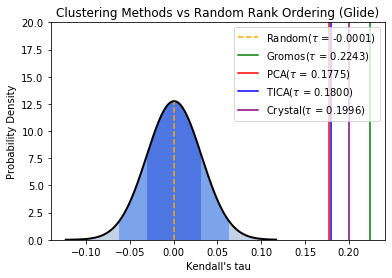

In [6]:
#PDF
plt.plot(x_plot, norm.pdf(x_plot, mean, sigma), 'r-', color = 'black', linewidth=2)    

#Coloring the Standard Deviations
plt.bar(x_plot, Norm, width1, align = 'edge', alpha = 0.75, color = 'lightsteelblue') 
plt.bar(x_plotnew2, norm_values2, width1, align = 'edge', alpha = 0.75, color = 'cornflowerblue')
plt.bar(x_plotnew1, norm_values1, width1, align = 'edge',alpha = 0.75, color = 'royalblue')

#Vertical lines for Kendall's Taus                                                    
plt.axvline(mean, color = 'orange', linestyle = '--', ymax = 12.630594844422115/20, label = 'Random(' + r"$\tau$"+' = -0.0001)')
plt.axvline(0.2243, color = 'green', label = 'Gromos(' + r"$\tau$"+' = 0.2243)')
plt.axvline(0.1775, color = 'red', label = 'PCA(' + r"$\tau$"+' = 0.1775)')
plt.axvline(0.1800, color = 'blue', label = 'TICA(' + r"$\tau$"+' = 0.1800)')
plt.axvline(0.1996, color = 'purple', label = 'Crystal(' + r"$\tau$"+' = 0.1996)')
plt.ylim(top=20)
plt.xlabel("Kendall's tau")
plt.ylabel('Probability Density')
plt.legend(loc='best')
plt.title("Clustering Methods vs Random Rank Ordering (Glide)")
plt.show() 

# 1 standard deviation away -> 0.7381006559222938 --> 73.8%  \ 0.6124998558647652 --> 61.2%
# Random did better than PCA -> 0.27590024518217154 --> 27.6% \ 0.7199998305675608 --> 72%
# Random did better than Gromos -> 0.07190006389488264 --> 7.2% \ 0.9463997772904713 --> 94.6%
# Random did better than Crystal -> 0.0064000056874443535 --> 0.6% \ 0.9966997654537328 -> 99.7%
# The lowest value achieved by the Random over the course of 10000 iterations was -0.11620100431002736 and the Kendall's Tau value for TICA was -0.17

#using z-scores
#PCA -> [(-0.02)-(-0.0001)]/0.032 = -0.621875 -> 26.7012% PCA did better than random 26.7012% of the time
#Gromos -> [(-0.05)-(-0.0001)]/0.032 = -1.559375 -> 5.9454% Gromos did better than random 5.9454% of the time
#Crystal -> [(-0.08)-(-0.0001)]/0.032 = -2.496875 -> 0.6265% Crystal did better than random pusd of the time